# Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset


In [2]:
df = pd.read_csv("../data/data.csv")
df.head()

,treatment_id,date_of_introduction,observation_date,initial_female_count,leaf_area_cm2,population_density,replicate_id,cumulative_mite_count,number_of_eggs,no_of_eggs_hatched,male_count,female_count
0,T1R1,7/31/2019,8/1/2019,1,0.5,2.0,1,0,0,0,0,0
1,T1R1,7/31/2019,8/2/2019,1,0.5,2.0,1,0,0,0,0,0
2,T1R1,7/31/2019,8/3/2019,1,0.5,2.0,1,2,3,2,0,2
3,T1R1,7/31/2019,8/4/2019,1,0.5,2.0,1,6,4,4,0,4
4,T1R1,7/31/2019,8/5/2019,1,0.5,2.0,1,9,4,3,0,3


This is the data set that we could organize from the existing reseach


In [3]:
df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   treatment_id           3786 non-null   object 
 1   date_of_introduction   3786 non-null   object 
 2   observation_date       3786 non-null   object 
 3   initial_female_count   3786 non-null   int64  
 4   leaf_area_cm2          3786 non-null   float64
 5   population_density     3786 non-null   float64
 6   replicate_id           3786 non-null   int64  
 7   cumulative_mite_count  3786 non-null   int64  
 8   number_of_eggs         3786 non-null   int64  
 9   no_of_eggs_hatched     3786 non-null   int64  
 10  male_count             3786 non-null   int64  
 11  female_count           3786 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 355.1+ KB


## Data cleaning

Check for missing values, duplicates, incorrect data types, and fix inconsistent labels.


In [4]:
# Missing values
df.isnull().sum()


treatment_id             0
date_of_introduction     0
observation_date         0
initial_female_count     0
leaf_area_cm2            0
population_density       0
replicate_id             0
cumulative_mite_count    0
number_of_eggs           0
no_of_eggs_hatched       0
male_count               0
female_count             0
dtype: int64

The check for missing values confirms that there are no null values in any of the columns. This simplifies the data preprocessing steps, as we don't need to handle missing data.

In [5]:
# Duplicates
df.duplicated().sum()

np.int64(0)

The check for duplicate rows shows that there are no duplicate entries in the dataset. This is another positive finding that simplifies preprocessing.

no duplicate datas


In [6]:
df[["observation_date", "date_of_introduction"]] = df[["observation_date", "date_of_introduction"]].apply(
    pd.to_datetime
)
df.dtypes

treatment_id                     object
date_of_introduction     datetime64[ns]
observation_date         datetime64[ns]
initial_female_count              int64
leaf_area_cm2                   float64
population_density              float64
replicate_id                      int64
cumulative_mite_count             int64
number_of_eggs                    int64
no_of_eggs_hatched                int64
male_count                        int64
female_count                      int64
dtype: object

## Data Profiling

Basic overview and statistical summary of the dataset.


In [7]:
df.shape

(3786, 12)

In [8]:
df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   treatment_id           3786 non-null   object        
 1   date_of_introduction   3786 non-null   datetime64[ns]
 2   observation_date       3786 non-null   datetime64[ns]
 3   initial_female_count   3786 non-null   int64         
 4   leaf_area_cm2          3786 non-null   float64       
 5   population_density     3786 non-null   float64       
 6   replicate_id           3786 non-null   int64         
 7   cumulative_mite_count  3786 non-null   int64         
 8   number_of_eggs         3786 non-null   int64         
 9   no_of_eggs_hatched     3786 non-null   int64         
 10  male_count             3786 non-null   int64         
 11  female_count           3786 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(7), object(1)
memory u

In [9]:
df.describe().T  # Display summary statistics of the DataFrame

,count,mean,min,25%,50%,75%,max,std
date_of_introduction,3786,2019-10-11 19:55:03.328050688,2019-07-31 00:00:00,2019-08-21 00:00:00,2019-10-23 00:00:00,2019-11-21 00:00:00,2019-12-05 00:00:00,NaN
observation_date,3786,2019-10-21 22:05:53.724247040,2019-08-01 00:00:00,2019-08-29 00:00:00,2019-11-02 00:00:00,2019-12-01 00:00:00,2019-12-25 00:00:00,NaN
initial_female_count,3786.0,3.529583,0.0,1.0,3.0,5.0,10.0,2.760027
leaf_area_cm2,3786.0,5.894216,0.5,1.5,5.0,7.5,15.0,4.461116
population_density,3786.0,0.860063,0.0,0.4,0.666667,1.0,2.0,0.595467
replicate_id,3786.0,12.464871,1.0,6.0,12.0,18.0,29.0,7.259883
cumulative_mite_count,3786.0,156.924194,0.0,28.0,118.0,257.0,751.0,147.071416
number_of_eggs,3786.0,12.337295,0.0,3.0,7.0,18.0,87.0,13.757729
no_of_eggs_hatched,3786.0,11.715531,0.0,2.0,6.5,17.0,116.0,13.320564
male_count,3786.0,2.075277,0.0,0.0,1.0,3.0,28.0,2.955127


Statistical Summary
 - cumulative_mite_count: target variable. It has a wide range, from a minimum of 0 to a maximum of 751, with a mean of about 157. The large standard deviation (147) confirms the wide spread of values.

 - initial_female_count: The initial population in the experiments ranges from 0 to 10, with a mean of about 3.5.

 - number_of_eggs: The number_of_eggs varies significantly, from 0 to 87, with a mean of around 12.

 - male_count & female_count: The number of females (mean of 9.3) is generally higher than the number of males (mean of 2.1).

 - The large difference between the mean and the median (50th percentile) for cumulative_mite_count, number_of_eggs, and female_count suggests that the distributions for these variables might be skewed to the right.


## Univariate Analysis

Visualize and summarize individual variables.


In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['initial_female_count', 'leaf_area_cm2', 'population_density',
       'replicate_id', 'cumulative_mite_count', 'number_of_eggs',
       'no_of_eggs_hatched', 'male_count', 'female_count'],
      dtype='object')

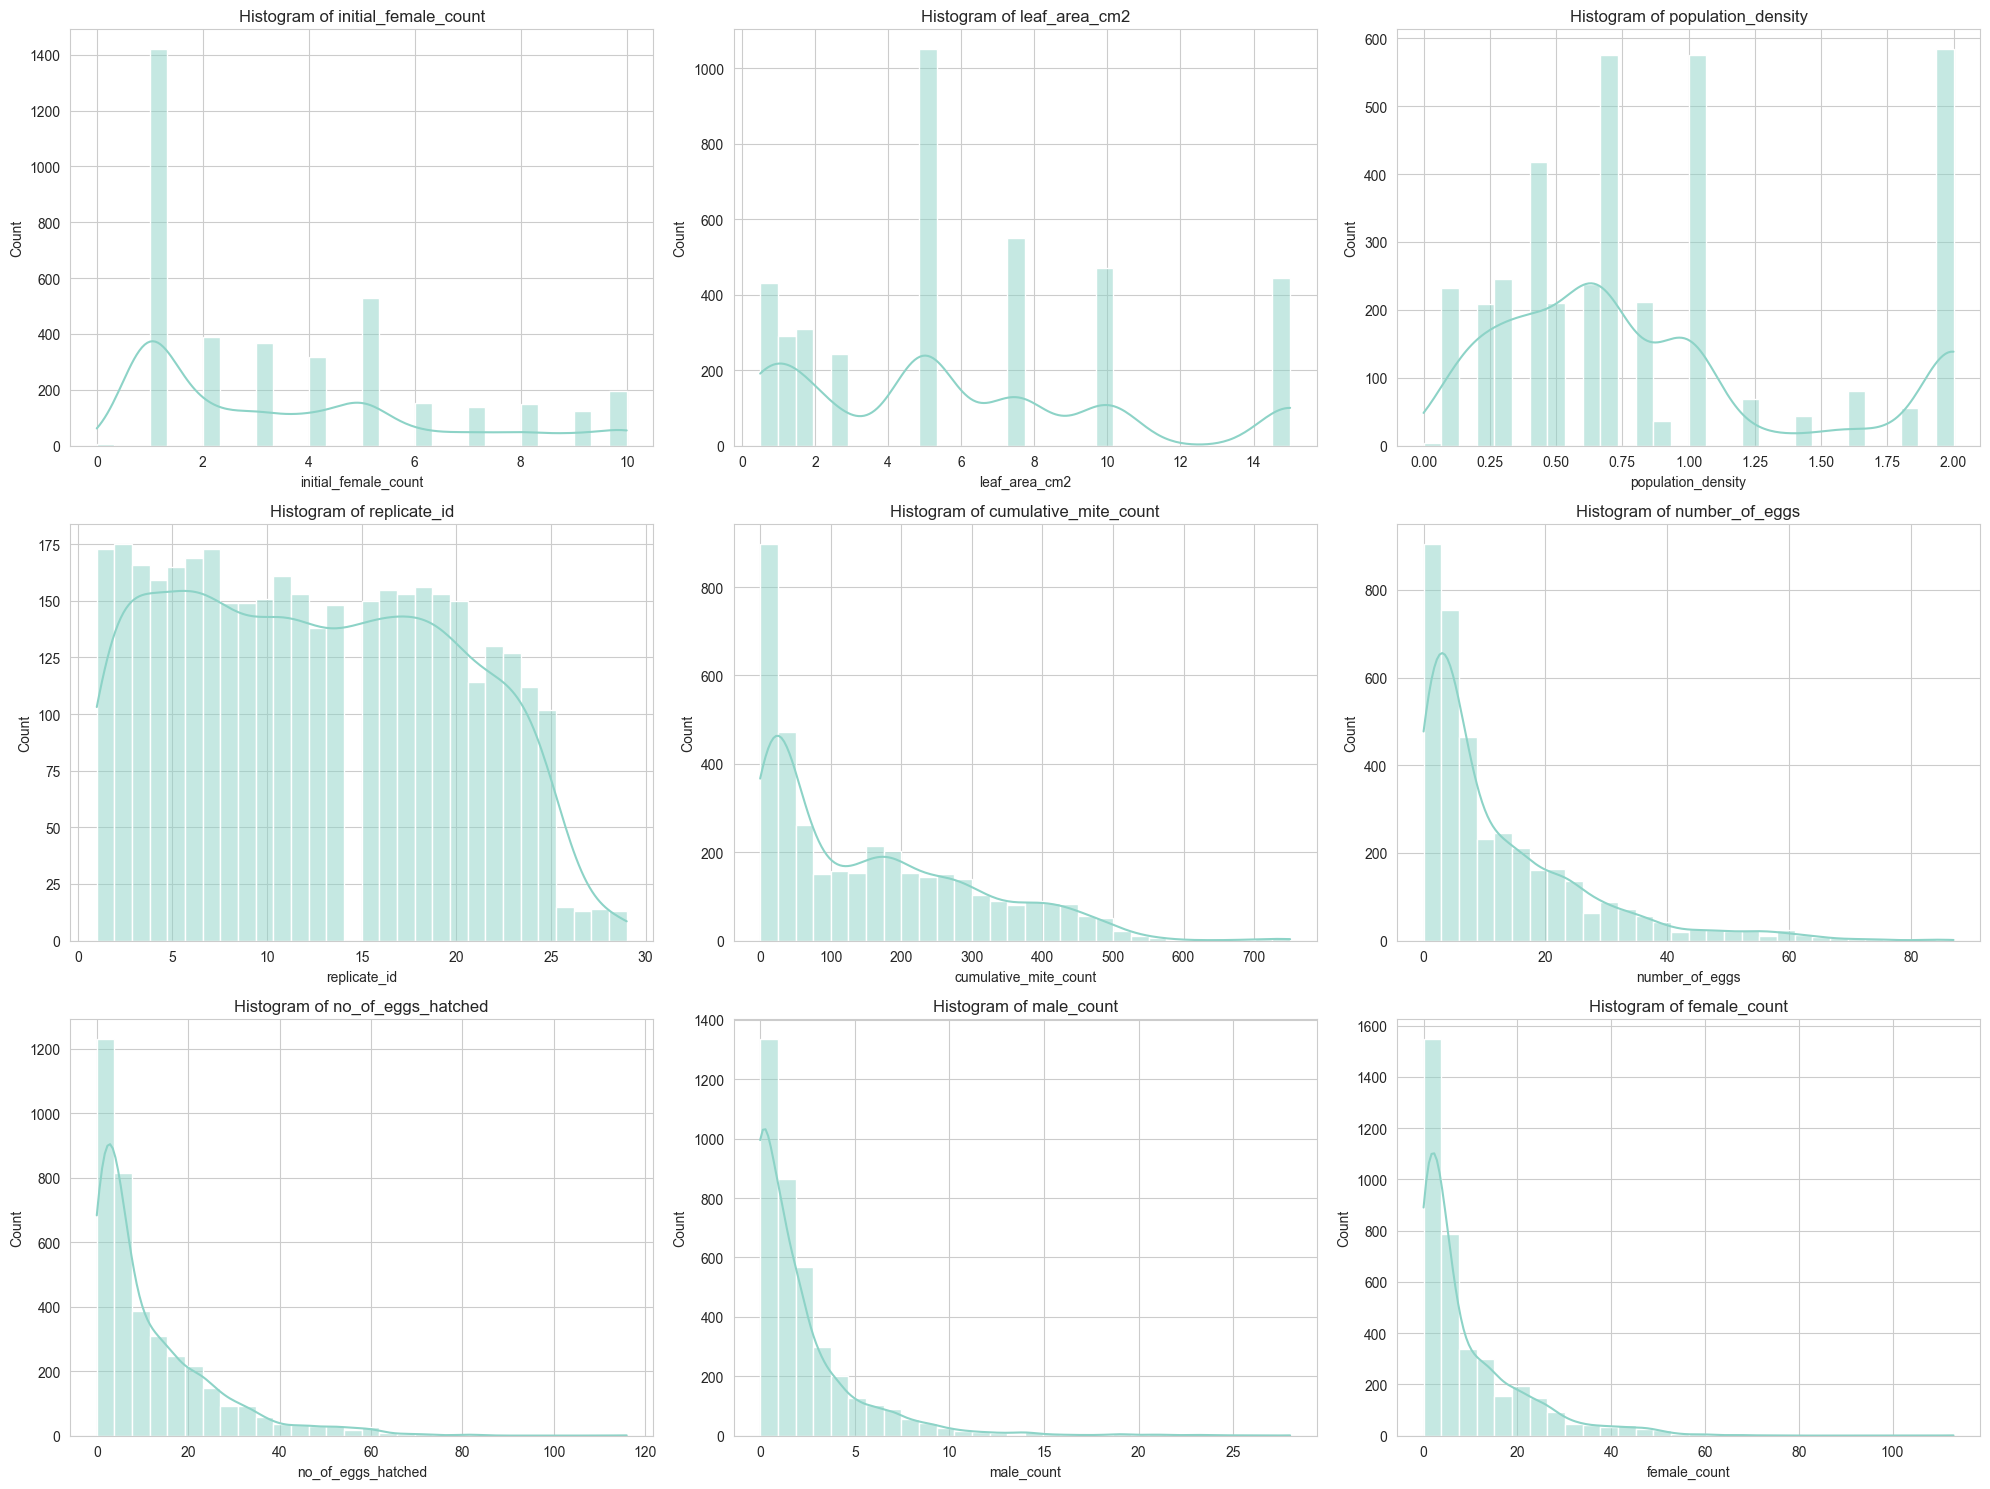

In [11]:
sns.set_style("whitegrid")
n_cols = len(numeric_cols)
n_rows = int(np.ceil(n_cols / 3))
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))

axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i]).set_title(
        f"Histogram of {col}"
    )

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

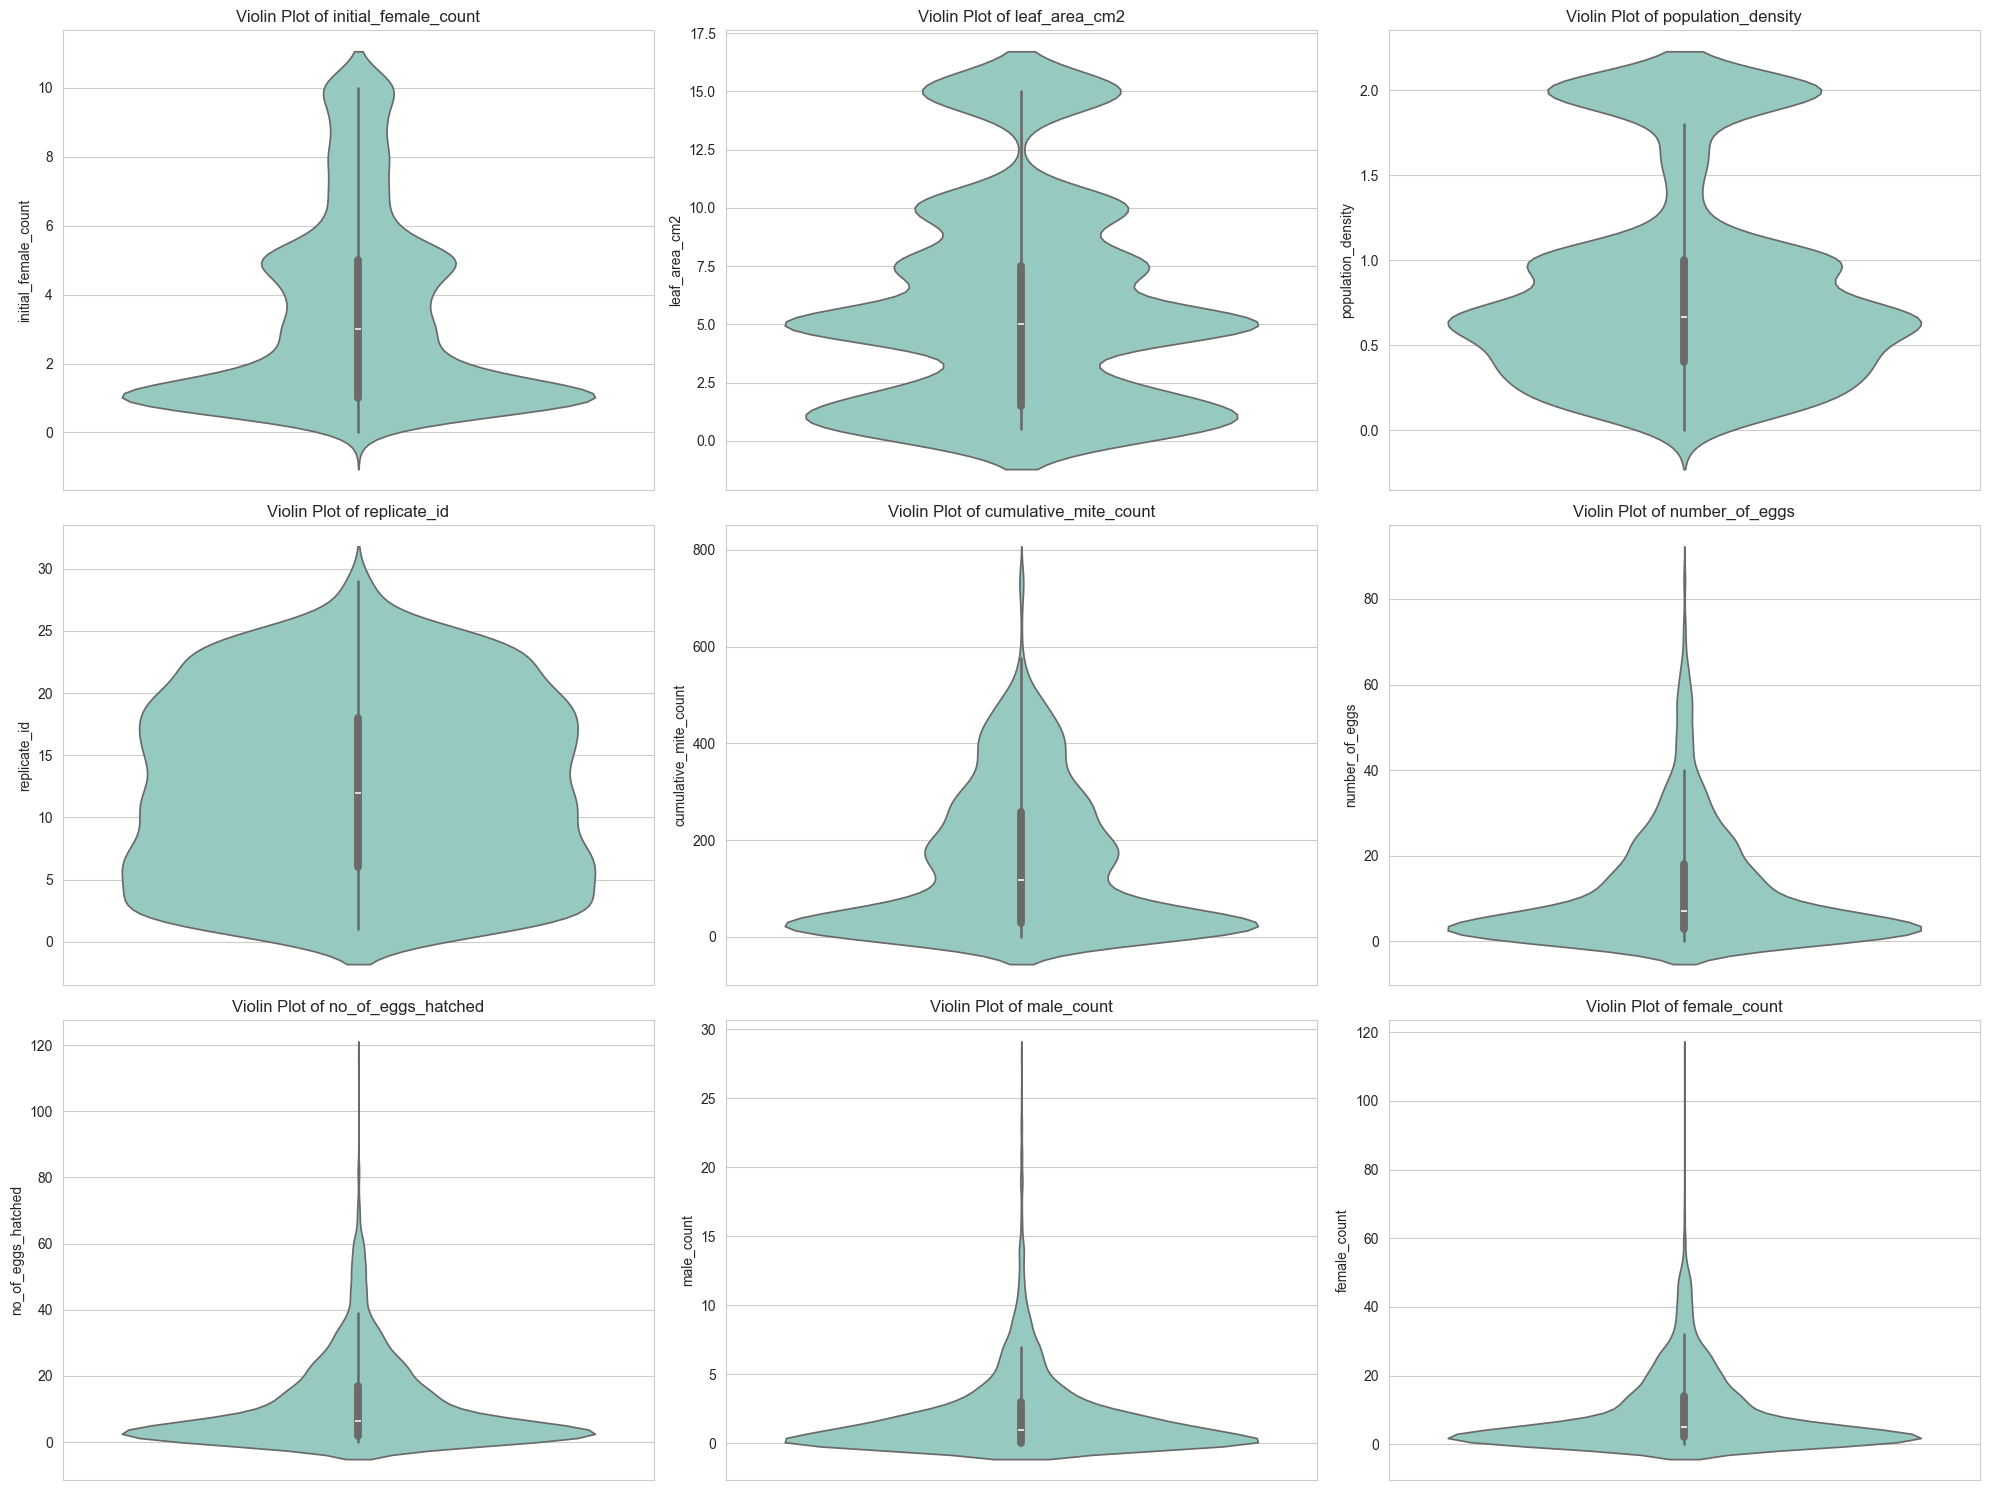

In [12]:
# Violin plots for all numeric columns
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))

axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.violinplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Violin Plot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

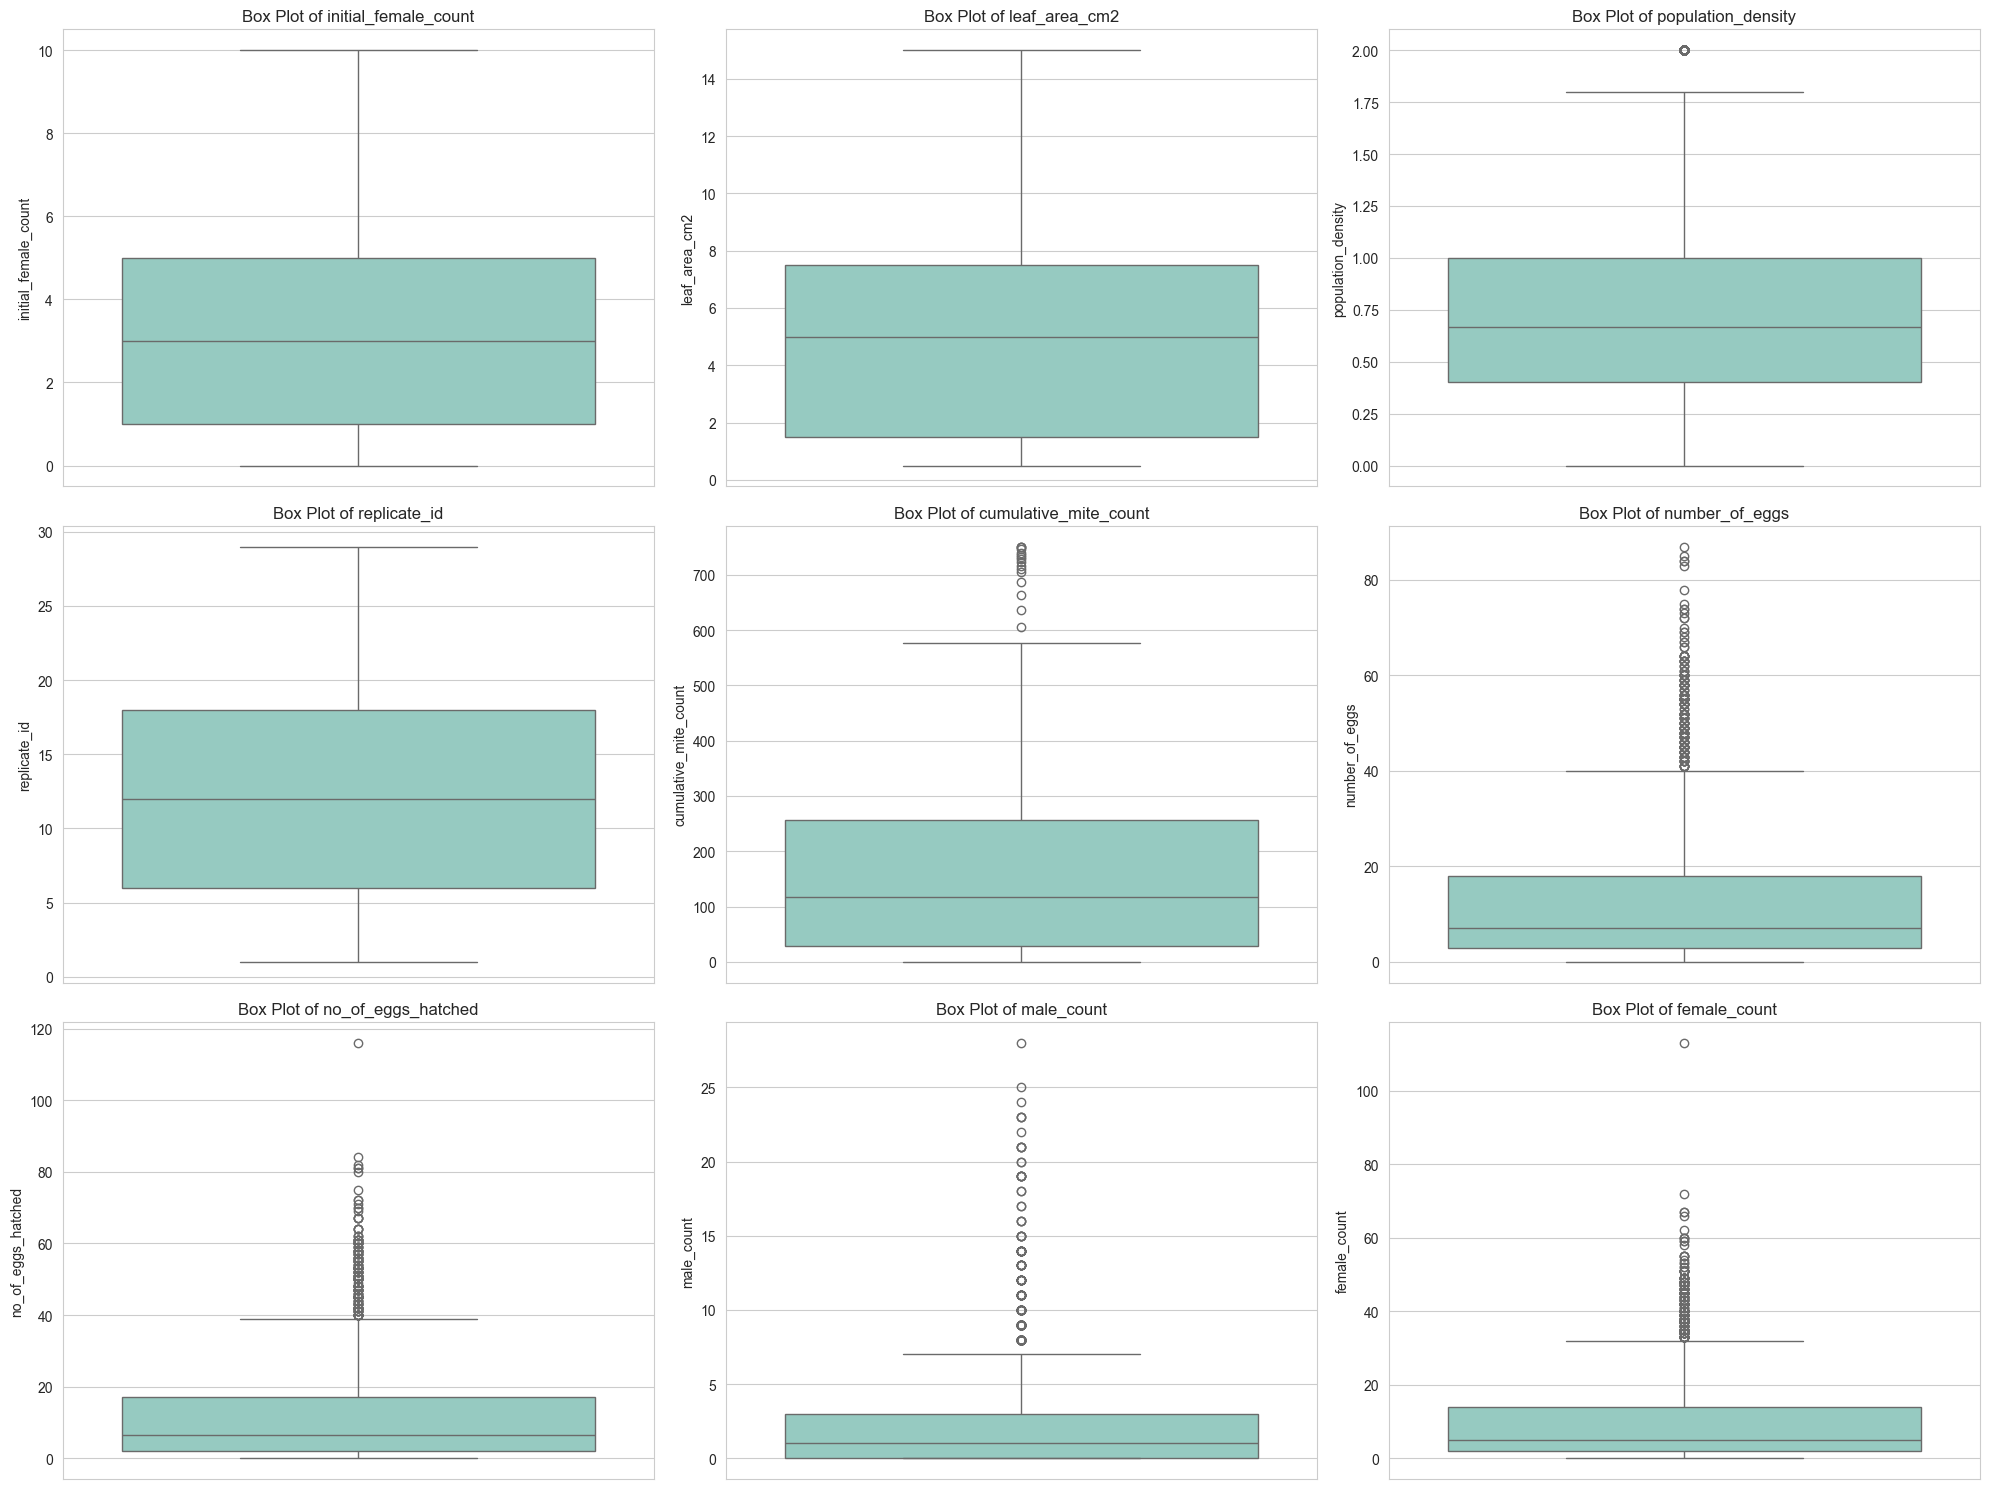

In [13]:
# Box plots for all numeric columns
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))

axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Distribution of Variables
The histograms confirm that the cumulative_mite_count, number_of_eggs, male_count, and female_count columns are right-skewed, with most of the data concentrated at lower values.

The initial_female_count,population_density and leaf_area_cm2 variables appear to be multi-modal, meaning they have several distinct peaks in their distributions.

The violin plots also highlight the same distributions, with the wider sections of the plots indicating where the data is more concentrated.

## Bivariate & Multivariate Analysis

Explore relationships between variables.


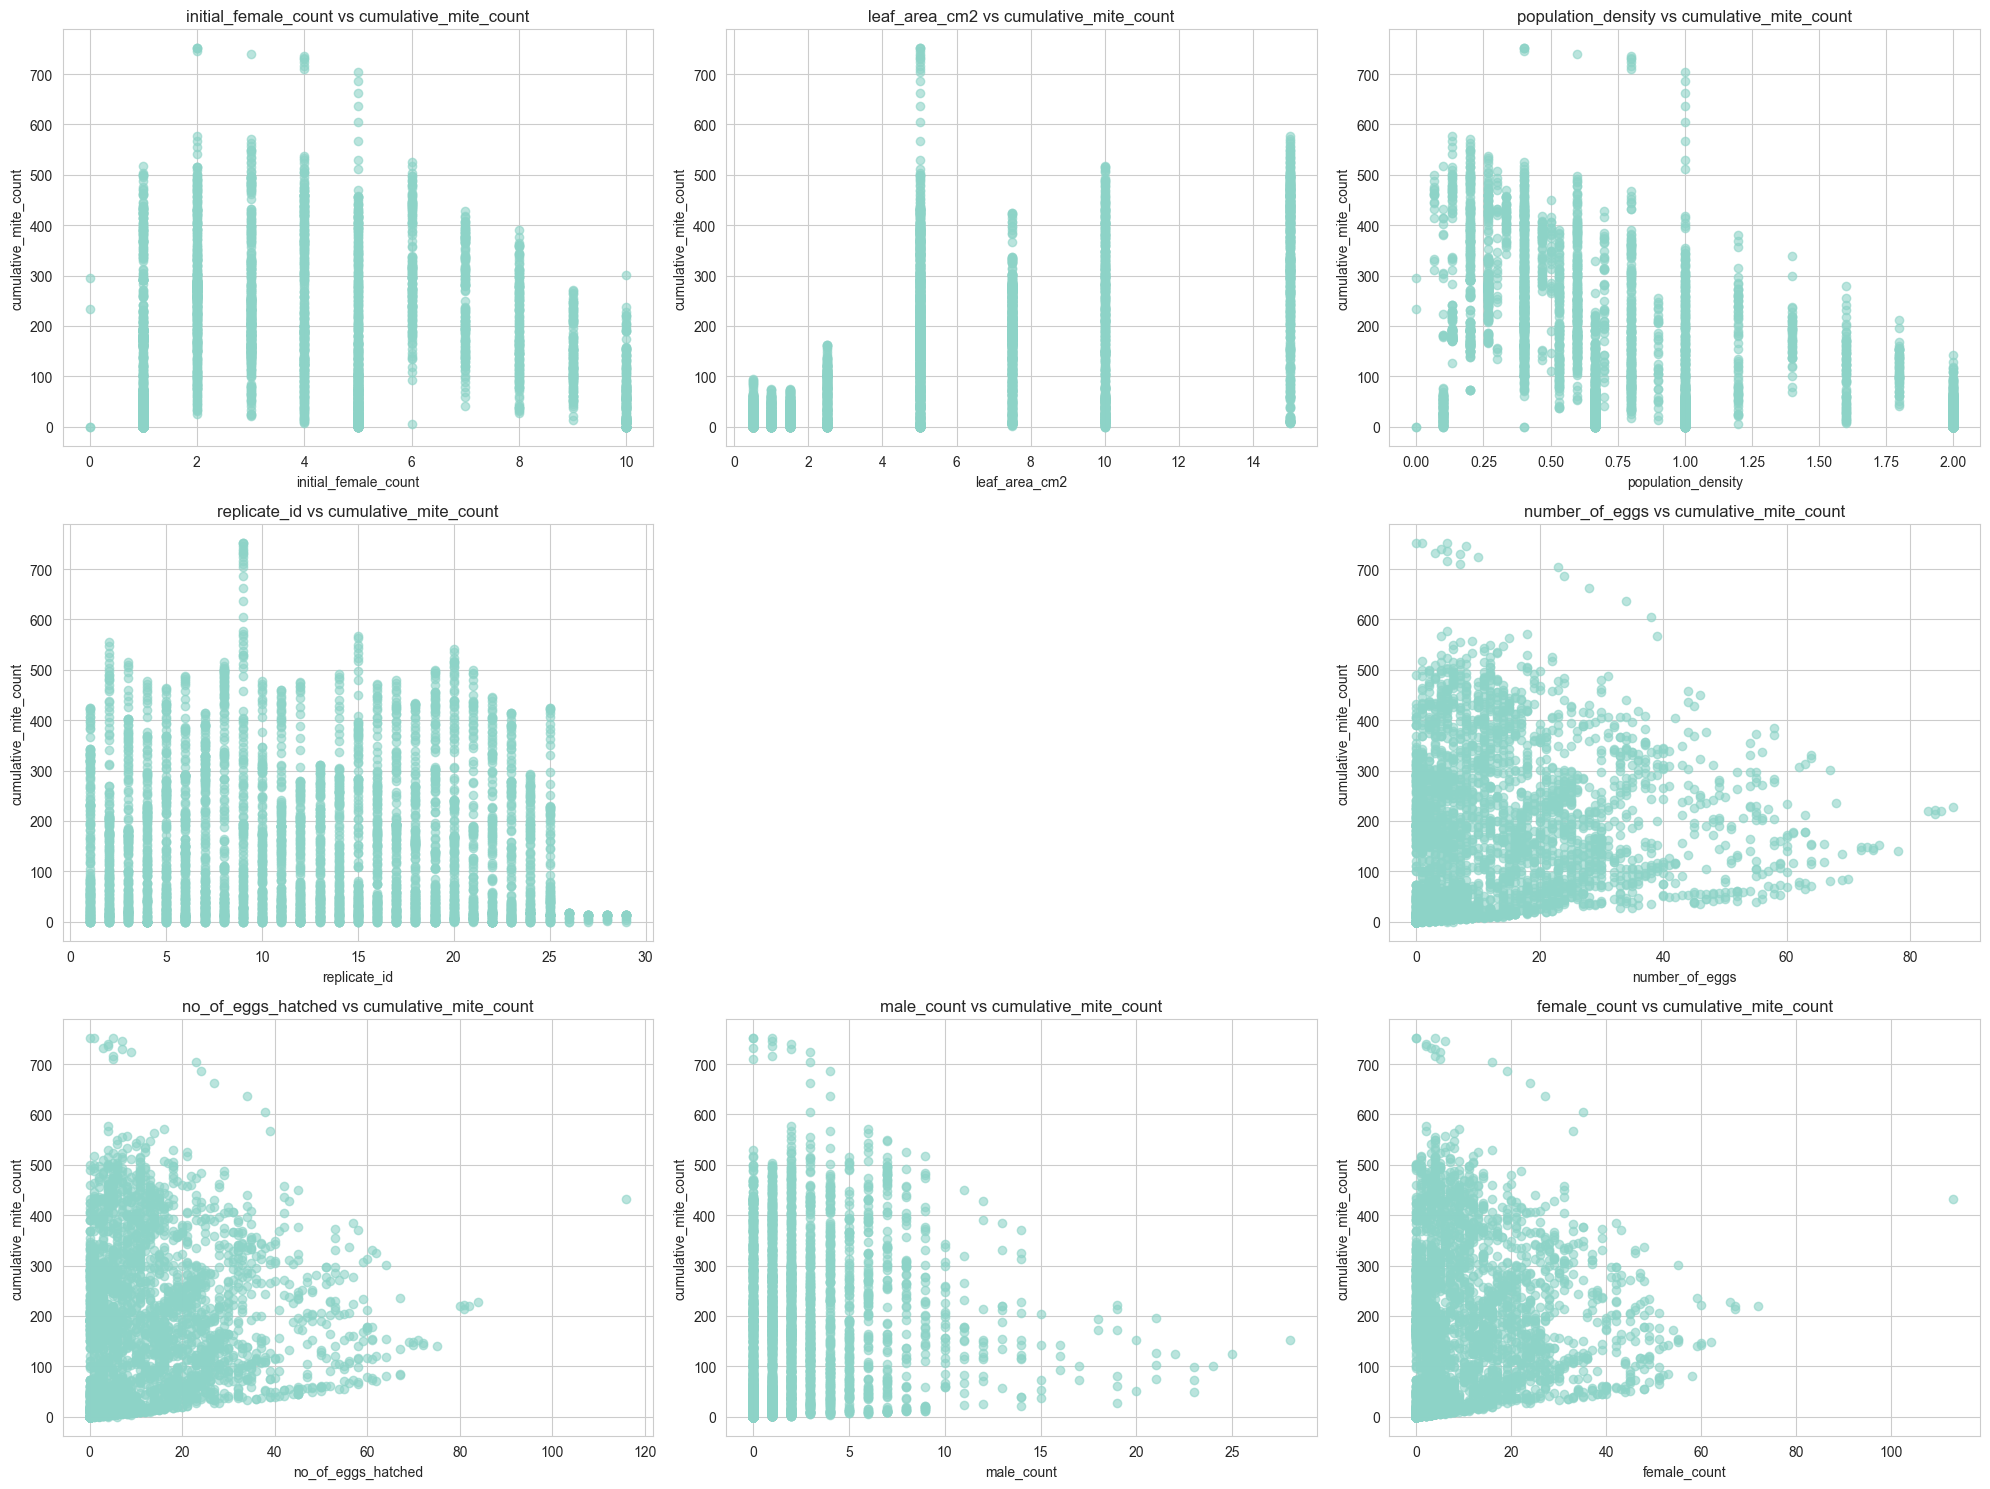

In [14]:
# Scatter plots: each numeric column vs 'cumulative_mite_count'
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    if col != "cumulative_mite_count":
        axes[idx].scatter(df[col], df["cumulative_mite_count"], alpha=0.6)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("cumulative_mite_count")
        axes[idx].set_title(f"{col} vs cumulative_mite_count")
    else:
        axes[idx].axis("off")  # Hide the plot for 'cumulative_mite_count' vs 'cumulative_mite_count'

plt.tight_layout()
plt.show()

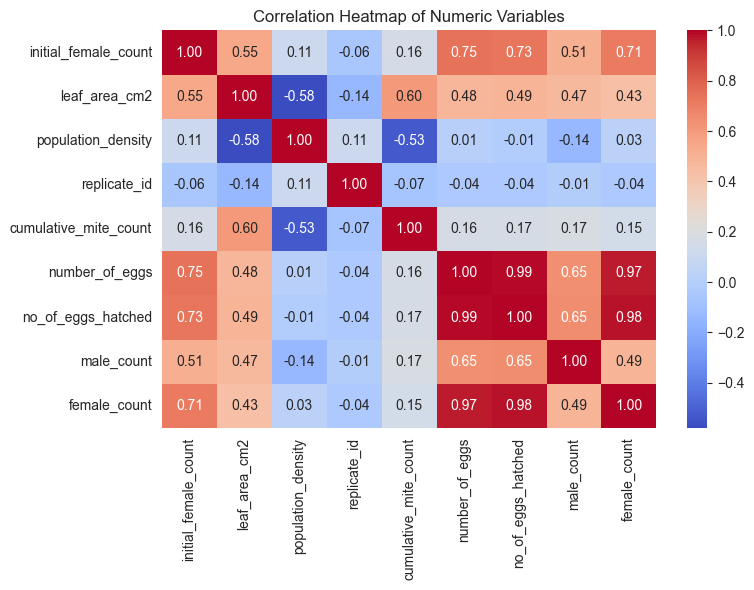

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

### Correlation Between Variables
The correlation matrix reveals several important relationships.

There is a very strong positive correlation among the variables number_of_eggs, no_of_eggs_hatched, and female_count.

- number_of_eggs and no_of_eggs_hatched have a correlation of 0.99.

- number_of_eggs and female_count have a correlation of 0.97.

- no_of_eggs_hatched and female_count have a correlation of 0.98.

This indicates high multicollinearity between these three variables, which is expected as they are biologically linked.

The target variable, cumulative_mite_count, shows the following relationships:

- A moderate positive correlation with leaf_area_cm2 (0.60).

- A moderate negative correlation with population_density (-0.53).

- Weak positive correlations with no_of_eggs_hatched (0.17), number_of_eggs (0.16), initial_female_count (0.16), and female_count (0.15). This is contrary to what might be expected.

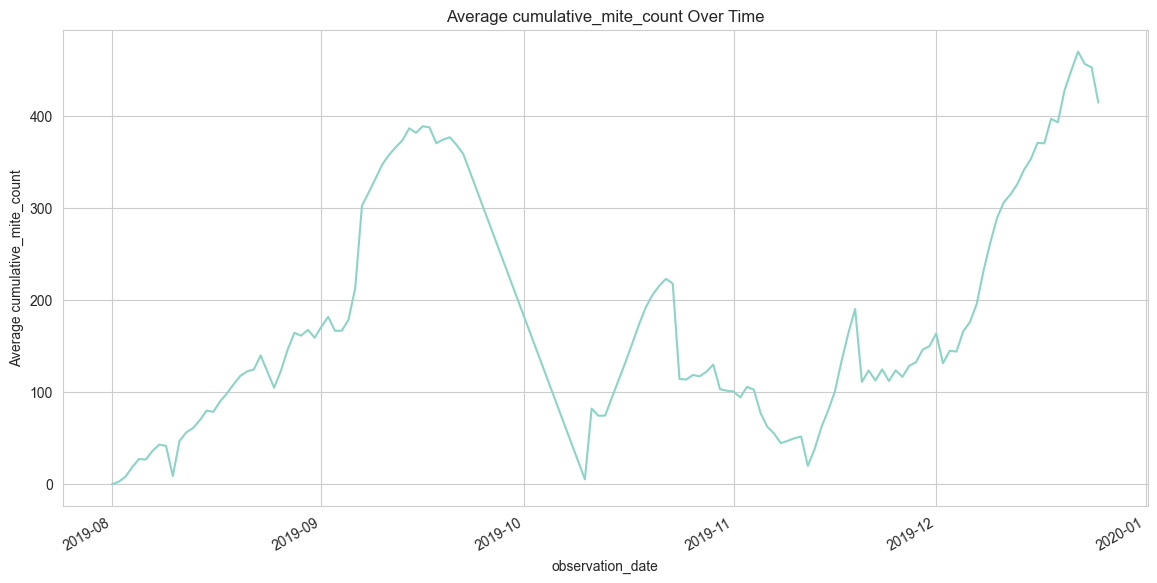

In [16]:
#Time-Series Plot
plt.figure(figsize=(14, 7))
df.groupby('observation_date')['cumulative_mite_count'].mean().plot()
plt.title('Average cumulative_mite_count Over Time')
plt.ylabel('Average cumulative_mite_count')
plt.grid(True)
plt.show()

### Trends Over Time
- The average cumulative_mite_count shows a clear upward trend over the months, peaking around November and December.

- There appears to be some cyclical behavior, which could be related to seasonal changes or the lifecycle of the organisms in the experiment.

## Outlier Detection

Detect and optionally handle outliers.


In [17]:
from scipy.stats import zscore

outliers = []

for col in numeric_cols:
    # Z-score method
    z_scores = zscore(df[col])
    outliers_z = df[np.abs(z_scores) > 3]

    # IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers.append({
        'column': col,
        'z_score_outliers': outliers_z.shape[0],
        'iqr_outliers': outliers_iqr.shape[0]
    }) 
outliers = pd.DataFrame(outliers)

outliers

,column,z_score_outliers,iqr_outliers
0,initial_female_count,0,0
1,leaf_area_cm2,0,0
2,population_density,0,584
3,replicate_id,0,0
4,cumulative_mite_count,16,16
5,number_of_eggs,94,189
6,no_of_eggs_hatched,90,183
7,male_count,81,204
8,female_count,82,198


## Key Takeaways for Decision-Making
Here are the essential findings from our analysis that will be most useful for upcoming work on feature engineering, model selection, and prediction.

### Key Variable Distributions
Target Variable (cumulative_mite_count) is Skewed: The cumulative_mite_count variable, which is our target for prediction, is highly right-skewed. This means most of the values are concentrated on the lower end, with a few very high values. This is also true for Number Of eggs, male, and female.

>Decision: For some machine learning models (like linear regression),might need to apply a log transformation to these skewed variables to help the model perform better. For tree-based models like Random Forest, this is less of a concern.

Multimodality in Features: The initial_female_count,population_density and leaf_area_cm2 variables show multiple peaks in their distributions, which suggests there might be distinct groups or experimental setups within the data.

>Decision: This could be an interesting area to explore further.  might consider creating a new categorical feature based on these different models to see if it improves model's predictive power.

### Core Relationships & Correlations
Moderate Predictors Identified: The cumulative_mite_count is most strongly (but moderately) correlated with leaf_area_cm2 (0.60) and population_density (-0.53). Surprisingly, variables like female_count (0.15) and no_of_eggs_hatched (0.17) are only weakly correlated with the final mite count.

>Decision: leaf_area_cm2 and population_density are  most promising predictors from this set. They should be included as features in  model.

High Multicollinearity: The variables female_count, number_of_eggs, and no_of_eggs_hatched are extremely highly correlated with each other (all >0.97).

>Decision: Including all three of these variables in a model like linear regression would cause significant multicollinearity issues.  should select only one (e.g., female_count) to represent the group. Tree-based models can handle this better, but it's still good practice to be aware of it.

### Temporal Patterns
Clear Upward Trend: There's a noticeable upward trend in the average count over time, especially in the later months of the year.

>Decision: This indicates that time-based features are essential. should definitely create features that capture the passage of time, such as day_of_year or experiment_age (the number of days since the start of an experiment). These will help  model understand and learn from this trend.

### Actionable Insights for Modeling
Based on these takeaways, here is a summary of recommended actions for  next steps:

Feature Engineering:

- Must-Haves: leaf_area_cm2, population_density.
- Handle Multicollinearity: If choose to include the highly correlated egg/female variables, select only one of them (e.g., female_count) to avoid redundancy.
- Time-Based: Create day_of_year and experiment_age from the date columns.

- Consider: A log transform of skewed features if choose a linear model.

### Model Selection:

Good Starting Point: A Random Forest or Gradient Boosting model would be an excellent choice here. They are powerful, can handle the non-linear relationships and skewed data without much preprocessing, and can give insights into feature importance.

Simpler Models: If opt for a simpler model like Linear Regression, be sure to address the skewed data and multicollinearity.